In [1]:
# Data manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Metrics
from sklearn.metrics import (classification_report, confusion_matrix, 
                             ConfusionMatrixDisplay, balanced_accuracy_score, accuracy_score, make_scorer)
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Utils
import bootcampviztools as bt

# Pipelines
from sklearn.pipeline import Pipeline

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Descripción de las Columnas del Dataset

| **Columna**               | **Descripción** |
|---------------------------|----------------|
| `Applicant_ID`            | Identificador único de cada solicitante. |
| `Applicant_Gender`        | Género del solicitante (`M` para masculino, `F` para femenino). |
| `Owned_Car`              | Indica si el solicitante posee un coche (`1` para sí, `0` para no). |
| `Owned_Realty`           | Indica si el solicitante posee una propiedad inmobiliaria (`1` para sí, `0` para no). |
| `Total_Children`         | Número total de hijos del solicitante. |
| `Total_Income`           | Ingreso total anual del solicitante. |
| `Income_Type`            | Tipo de fuente de ingresos del solicitante (por ejemplo, "Working", "State Servant", "Commercial associate"). |
| `Education_Type`         | Nivel de educación del solicitante (por ejemplo, "Higher education", "Secondary education"). |
| `Family_Status`          | Estado civil del solicitante (por ejemplo, "Married", "Single", "Widow"). |
| `Housing_Type`           | Tipo de vivienda en la que reside el solicitante (por ejemplo, "House / apartment", "Municipal apartment"). |
| `Owned_Mobile_Phone`     | Indica si el solicitante posee un teléfono móvil (`1` para sí, `0` para no). |
| `Owned_Work_Phone`       | Indica si el solicitante posee un teléfono de trabajo (`1` para sí, `0` para no). |
| `Owned_Phone`            | Indica si el solicitante posee otro teléfono adicional (`1` para sí, `0` para no). |
| `Owned_Email`            | Indica si el solicitante posee un correo electrónico (`1` para sí, `0` para no). |
| `Job_Title`              | Cargo o título profesional del solicitante (por ejemplo, "Accountants", "Laborers", "Managers"). |
| `Total_Family_Members`   | Número total de miembros en la familia del solicitante. |
| `Applicant_Age`          | Edad del solicitante en años. |
| `Years_of_Working`       | Años de experiencia laboral del solicitante. |
| `Total_Bad_Debt`         | Cantidad total de deudas incobrables del solicitante. |
| `Total_Good_Debt`        | Cantidad total de deudas bien gestionadas del solicitante. |
| `Status`                 | Estado del solicitante (`1` para aprobado, `0` para rechazado). |

In [2]:
# Load data
data = pd.read_csv("../data/Application_Data.csv")
df = data.copy()
df.head(5)

,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,...,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
0,5008806,M,1,1,0,112500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Security staff ...,2,59,4,0,30,1
1,5008808,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,5,1
2,5008809,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,5,1
3,5008810,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,27,1
4,5008811,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,39,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25128 entries, 0 to 25127
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Applicant_ID          25128 non-null  int64 
 1   Applicant_Gender      25128 non-null  object
 2   Owned_Car             25128 non-null  int64 
 3   Owned_Realty          25128 non-null  int64 
 4   Total_Children        25128 non-null  int64 
 5   Total_Income          25128 non-null  int64 
 6   Income_Type           25128 non-null  object
 7   Education_Type        25128 non-null  object
 8   Family_Status         25128 non-null  object
 9   Housing_Type          25128 non-null  object
 10  Owned_Mobile_Phone    25128 non-null  int64 
 11  Owned_Work_Phone      25128 non-null  int64 
 12  Owned_Phone           25128 non-null  int64 
 13  Owned_Email           25128 non-null  int64 
 14  Job_Title             25128 non-null  object
 15  Total_Family_Members  25128 non-null

In [4]:
df["Status"].value_counts(normalize=True)

Status
1    0.995185
0    0.004815
Name: proportion, dtype: float64

In [5]:
target = "Status"

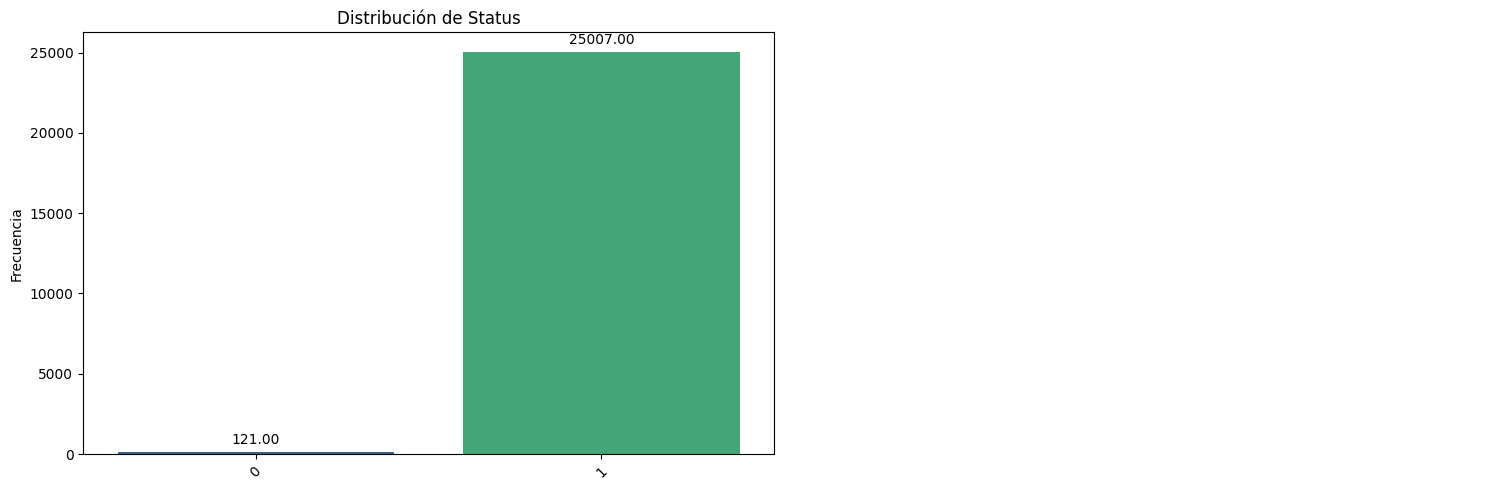

In [6]:
bt.pinta_distribucion_categoricas(df, [target], mostrar_valores= True)

In [7]:
for col in df.columns:
    print(f"\n🔹 Value Counts de '{col}':")
    print(df[col].value_counts())
    print("_" * 50)


🔹 Value Counts de 'Applicant_ID':
Applicant_ID
5008806    1
5104854    1
5104852    1
5104851    1
5104850    1
          ..
5053251    1
5053249    1
5053248    1
5053247    1
5150487    1
Name: count, Length: 25128, dtype: int64
__________________________________________________

🔹 Value Counts de 'Applicant_Gender':
Applicant_Gender
F          15627
M           9501
Name: count, dtype: int64
__________________________________________________

🔹 Value Counts de 'Owned_Car':
Owned_Car
0    14615
1    10513
Name: count, dtype: int64
__________________________________________________

🔹 Value Counts de 'Owned_Realty':
Owned_Realty
1    16457
0     8671
Name: count, dtype: int64
__________________________________________________

🔹 Value Counts de 'Total_Children':
Total_Children
0    15908
1     6118
2     2715
3      312
4       57
5       18
Name: count, dtype: int64
__________________________________________________

🔹 Value Counts de 'Total_Income':
Total_Income
135000    3012
1800

# 1. MiniEDA

## 1.1. Variables Numéricas

In [8]:
df.drop(['Applicant_ID'], axis=1, inplace=True)

In [9]:
numeric_cols = df.select_dtypes(include=['int64']).columns
numeric_cols

Index(['Owned_Car', 'Owned_Realty', 'Total_Children', 'Total_Income',
       'Owned_Mobile_Phone', 'Owned_Work_Phone', 'Owned_Phone', 'Owned_Email',
       'Total_Family_Members', 'Applicant_Age', 'Years_of_Working',
       'Total_Bad_Debt', 'Total_Good_Debt', 'Status'],
      dtype='object')

In [10]:
corr = np.abs(df[numeric_cols].corr()[target]).sort_values(ascending=False)
corr

Status                  1.000000
Total_Bad_Debt          0.458497
Total_Good_Debt         0.074516
Years_of_Working        0.021382
Total_Children          0.011036
Applicant_Age           0.010078
Total_Family_Members    0.010056
Owned_Email             0.009203
Owned_Work_Phone        0.005318
Owned_Phone             0.004323
Total_Income            0.003482
Owned_Realty            0.002716
Owned_Car               0.001604
Owned_Mobile_Phone           NaN
Name: Status, dtype: float64

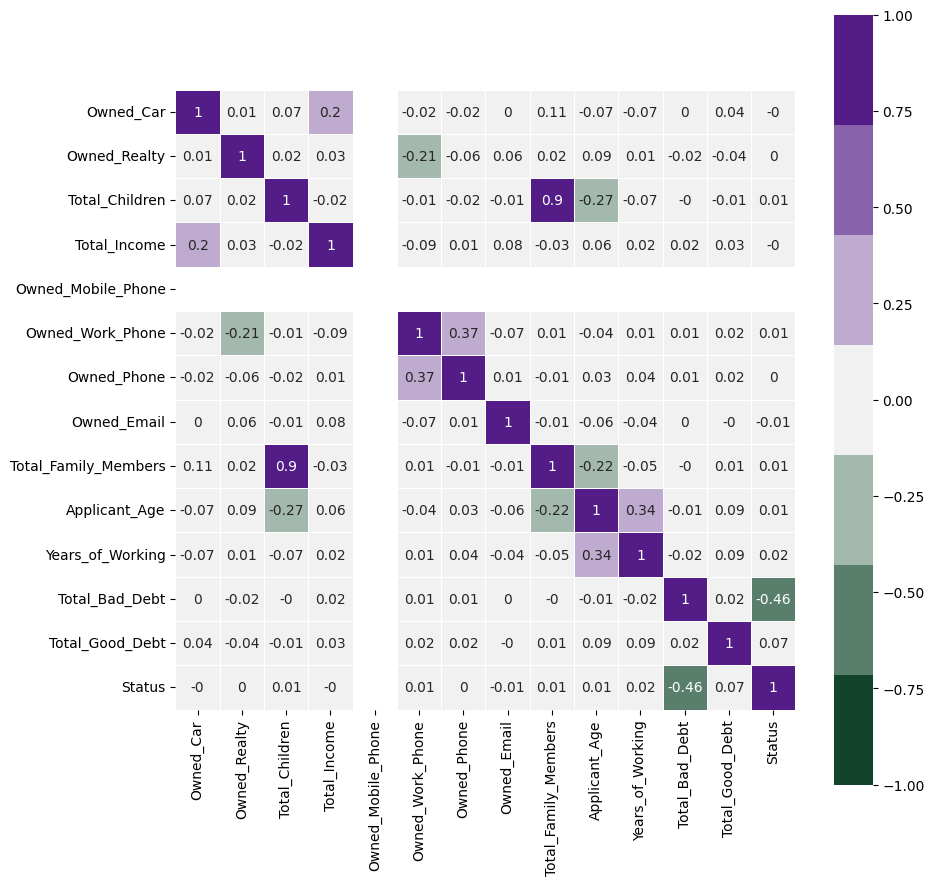

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(np.round(df[numeric_cols].corr(), 2),
            vmin=-1,
            vmax=1,
            annot=True,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True,
            linewidths=.5);

In [12]:
# Features con menos de 0.05 de correlación vs el target
bad_corr_feat = corr[corr < 0.01].index.values
good_corr_feat = corr[corr > 0.01].index.values

# Filtramos y eliminamos las columnas(Features) con con menos de 0.05 de correlación vs el target
df.drop(columns=bad_corr_feat, inplace=True)

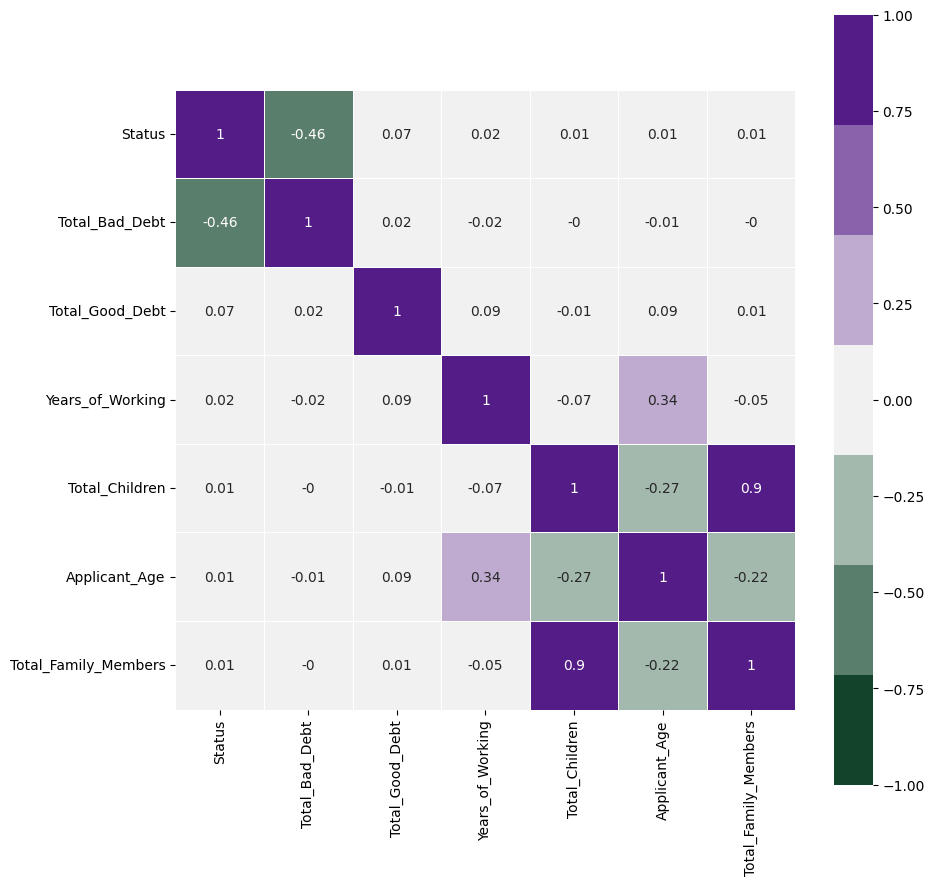

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(np.round(df[good_corr_feat].corr(), 2),
            vmin=-1,
            vmax=1,
            annot=True,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True,
            linewidths=.5);

In [14]:
features_num = [col for col in good_corr_feat if target not in col]
features_num

['Total_Bad_Debt',
 'Total_Good_Debt',
 'Years_of_Working',
 'Total_Children',
 'Applicant_Age',
 'Total_Family_Members']

array([[<Axes: title={'center': 'Total_Bad_Debt'}>,
        <Axes: title={'center': 'Total_Good_Debt'}>],
       [<Axes: title={'center': 'Years_of_Working'}>,
        <Axes: title={'center': 'Total_Children'}>],
       [<Axes: title={'center': 'Applicant_Age'}>,
        <Axes: title={'center': 'Total_Family_Members'}>]], dtype=object)

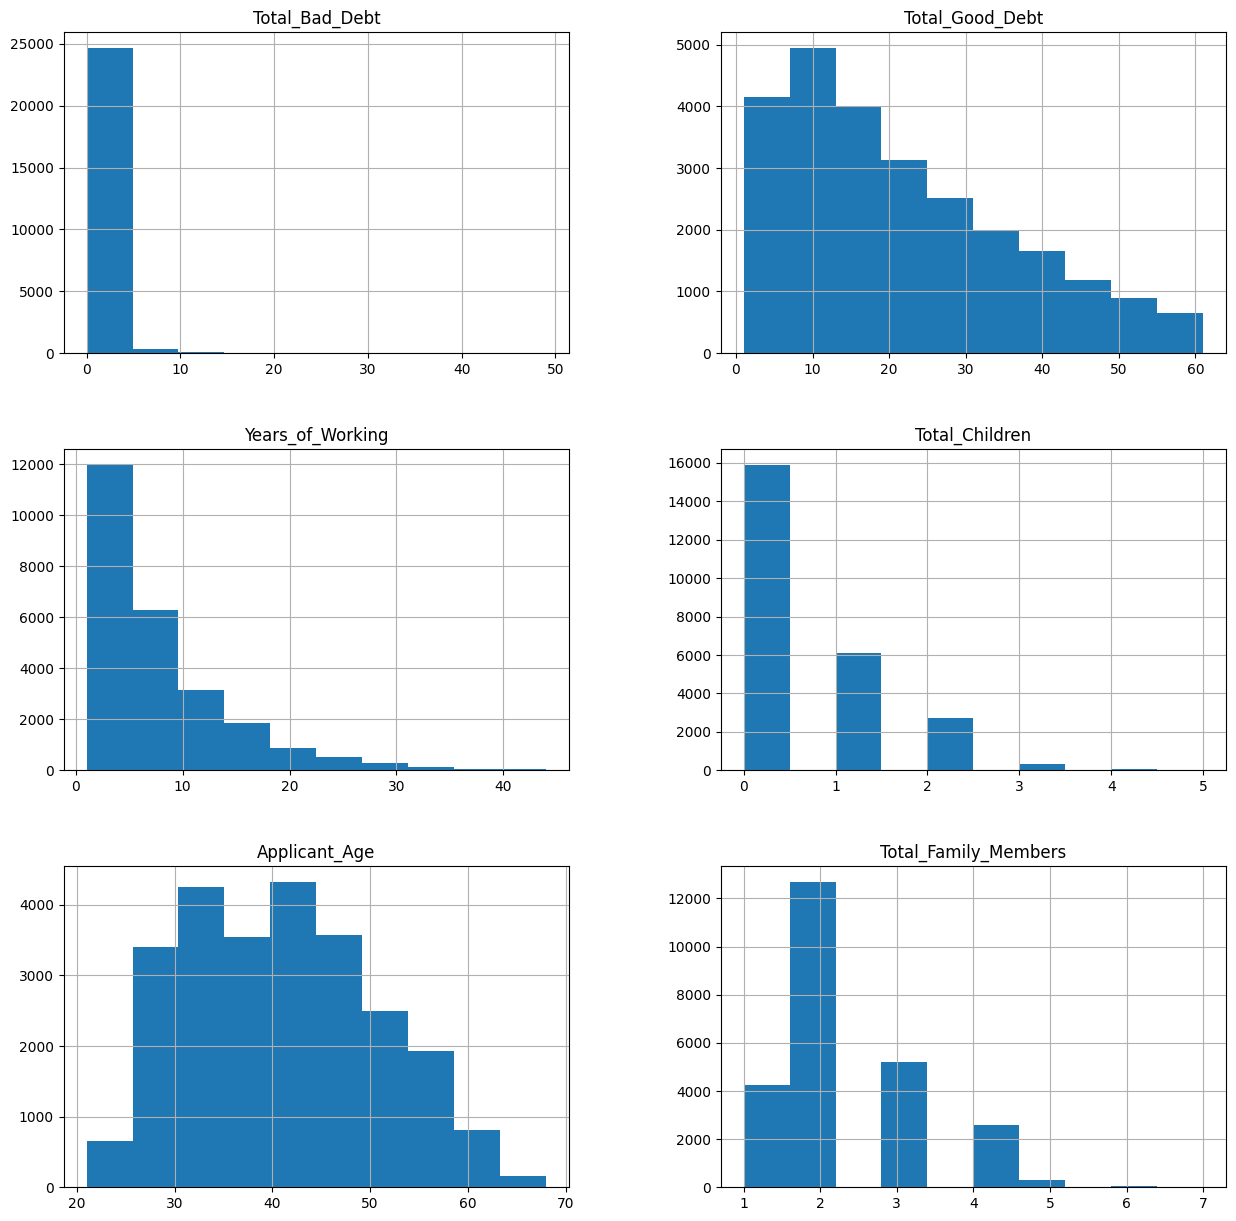

In [15]:
df[features_num].hist(figsize=(15,15))

In [16]:
df[features_num].describe()

,Total_Bad_Debt,Total_Good_Debt,Years_of_Working,Total_Children,Applicant_Age,Total_Family_Members
count,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000
mean,0.333095,21.057545,7.690903,0.509472,40.995503,2.291309
std,1.569448,14.735347,6.415007,0.762937,9.552832,0.928871
min,0.000000,1.000000,1.000000,0.000000,21.000000,1.000000
25%,0.000000,9.000000,3.000000,0.000000,33.000000,2.000000
50%,0.000000,18.000000,6.000000,0.000000,40.000000,2.000000
75%,0.000000,31.000000,10.000000,1.000000,48.000000,3.000000
max,49.000000,61.000000,44.000000,5.000000,68.000000,7.000000


In [17]:
features_num_log = ["Total_Good_Debt", "Years_of_Working", "Applicant_Age", "Total_Family_Members"]

array([[<Axes: title={'center': 'Total_Good_Debt'}>,
        <Axes: title={'center': 'Years_of_Working'}>],
       [<Axes: title={'center': 'Applicant_Age'}>,
        <Axes: title={'center': 'Total_Family_Members'}>]], dtype=object)

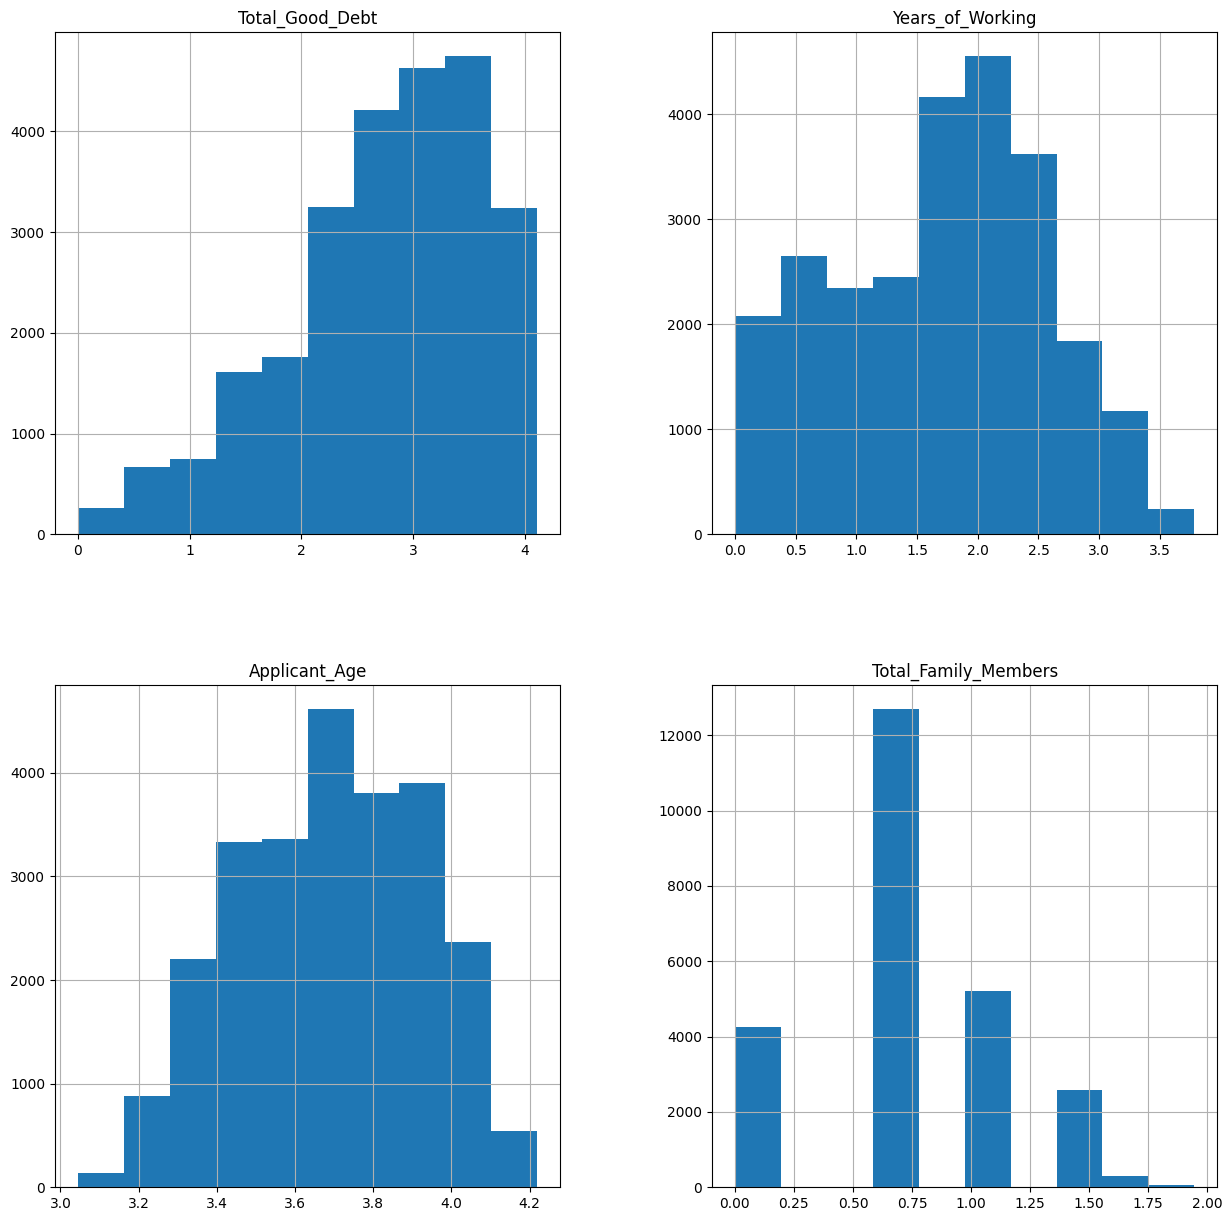

In [18]:
for col in features_num_log: # Aplicamos log a las features buscando una forma más normalizada
    df[col] = df[col].apply(np.log) 
df[features_num_log].hist(figsize=(15,15))

In [19]:
df[features_num_log].describe()

,Total_Good_Debt,Years_of_Working,Applicant_Age,Total_Family_Members
count,25128.000000,25128.000000,25128.000000,25128.000000
mean,2.737973,1.707275,3.685857,0.745099
std,0.873772,0.854180,0.236674,0.419558
min,0.000000,0.000000,3.044522,0.000000
25%,2.197225,1.098612,3.496508,0.693147
50%,2.890372,1.791759,3.688879,0.693147
75%,3.433987,2.302585,3.871201,1.098612
max,4.110874,3.784190,4.219508,1.945910


In [20]:
features_num = ["Total_Bad_Debt", "Total_Good_Debt", "Years_of_Working", "Total_Children", "Applicant_Age", "Total_Family_Members"]

In [21]:

scaler = StandardScaler() 
scaler.fit(df[features_num]) 
df[features_num] = pd.DataFrame(scaler.transform(df[features_num]), columns = features_num)

In [22]:
df.describe()

,Total_Children,Owned_Mobile_Phone,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
count,2.512800e+04,25128.0,2.512800e+04,2.512800e+04,2.512800e+04,2.512800e+04,2.512800e+04,25128.000000
mean,-2.855970e-17,1.0,-6.588525e-17,-7.979750e-16,1.582094e-16,-1.032108e-17,-4.032290e-16,0.995185
std,1.000020e+00,0.0,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,0.069227
min,-6.677899e-01,1.0,-1.775950e+00,-2.709828e+00,-1.998768e+00,-2.122410e-01,-3.133573e+00,0.000000
25%,-6.677899e-01,1.0,-1.238278e-01,-8.000572e-01,-7.125830e-01,-2.122410e-01,-6.188795e-01,1.000000
50%,-6.677899e-01,1.0,-1.238278e-01,1.277112e-02,9.890948e-02,-2.122410e-01,1.744179e-01,1.000000
75%,6.429603e-01,1.0,8.426019e-01,7.831338e-01,6.969515e-01,-2.122410e-01,7.965784e-01,1.000000
max,5.885961e+00,1.0,2.862144e+00,2.254833e+00,2.431520e+00,3.100955e+01,1.571266e+00,1.000000


## 1.1. Variables Categóricas

In [23]:
features_cat = df.select_dtypes(include=['object']).columns
features_cat

Index(['Applicant_Gender', 'Income_Type', 'Education_Type', 'Family_Status',
       'Housing_Type', 'Job_Title'],
      dtype='object')

In [24]:
df[features_cat]

,Applicant_Gender,Income_Type,Education_Type,Family_Status,Housing_Type,Job_Title
0,M,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,Security staff ...
1,F,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,Sales staff ...
2,F,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,Sales staff ...
3,F,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,Sales staff ...
4,F,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,Sales staff ...
...,...,...,...,...,...,...
25123,F,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,Core staff ...
25124,F,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,Core staff ...
25125,F,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,Core staff ...
25126,F,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,Core staff ...


In [25]:
df = pd.get_dummies(df, columns=features_cat,dtype=int)
df.head(5)

,Total_Children,Owned_Mobile_Phone,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status,Applicant_Gender_F,Applicant_Gender_M,...,Job_Title_Laborers,Job_Title_Low-skill Laborers,Job_Title_Managers,Job_Title_Medicine staff,Job_Title_Private service staff,Job_Title_Realty agents,Job_Title_Sales staff,Job_Title_Secretaries,Job_Title_Security staff,Job_Title_Waiters/barmen staff
0,-0.66779,1,-0.123828,1.654966,-0.375783,-0.212241,0.759051,1,0,1,...,0,0,0,0,0,0,0,0,1,0
1,-0.66779,1,-1.775950,1.201822,0.573602,-0.212241,-1.291593,1,1,0,...,0,0,0,0,0,0,1,0,0,0
2,-0.66779,1,-1.775950,1.201822,0.573602,-0.212241,-1.291593,1,1,0,...,0,0,0,0,0,0,1,0,0,0
3,-0.66779,1,-1.775950,1.201822,0.573602,-0.212241,0.638467,1,1,0,...,0,0,0,0,0,0,1,0,0,0
4,-0.66779,1,-1.775950,1.201822,0.573602,-0.212241,1.059323,1,1,0,...,0,0,0,0,0,0,1,0,0,0


# 2. División en train y test

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(target, axis=1), 
                                                    df[target],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=df[target])

In [27]:
# Combinar X_train e y_train
train_df = X_train.copy()
train_df[target] = y_train

# Combinar X_test e y_test
test_df = X_test.copy()
test_df[target] = y_test

# Exportar a CSV
train_df.to_csv("../data/Application_Data_train.csv", index=False)
test_df.to_csv("../data/Application_Data_test.csv", index=False)

In [28]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20102, 48)
(20102,)
(5026, 48)
(5026,)


## Sobremuestreo o Over-Sampling - SMOTE

In [29]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [30]:
y_train_smote.value_counts(True)

Status
1    0.5
0    0.5
Name: proportion, dtype: float64

In [31]:
print(X_train_smote.shape)
print(y_train_smote.shape)


(40010, 48)
(40010,)


### Modelos basline (Logistic Regression, Random Forrest, Xgboost)  `sin Smote`

In [32]:
# Función para entrenar y evaluar modelos
def train_and_evaluate(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"\nModel: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    # Matriz de Confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='cividis', xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()


Model: Logistic Regression
Accuracy: 0.9970155192996418
              precision    recall  f1-score   support

           0       0.85      0.46      0.59        24
           1       1.00      1.00      1.00      5002

    accuracy                           1.00      5026
   macro avg       0.92      0.73      0.80      5026
weighted avg       1.00      1.00      1.00      5026



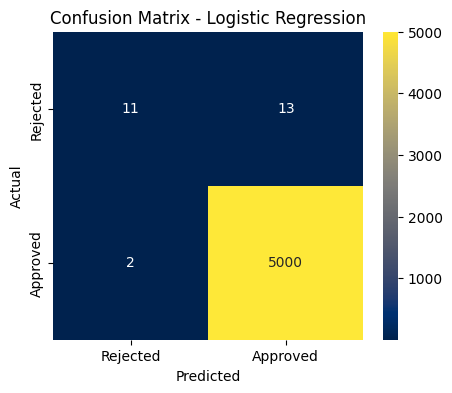

In [33]:
# Modelo 1: Regresión Logística
log_reg = LogisticRegression(max_iter=1000)
train_and_evaluate(log_reg, "Logistic Regression")


Model: Random Forest
Accuracy: 0.9978113808197374
              precision    recall  f1-score   support

           0       1.00      0.54      0.70        24
           1       1.00      1.00      1.00      5002

    accuracy                           1.00      5026
   macro avg       1.00      0.77      0.85      5026
weighted avg       1.00      1.00      1.00      5026



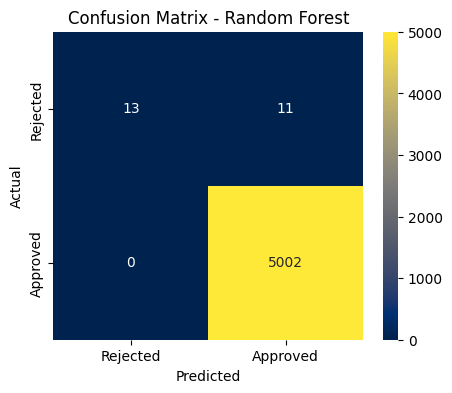

In [34]:
# Modelo 2: Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
train_and_evaluate(rf, "Random Forest")


Model: XGBoost
Accuracy: 0.9992041384799045
              precision    recall  f1-score   support

           0       0.95      0.88      0.91        24
           1       1.00      1.00      1.00      5002

    accuracy                           1.00      5026
   macro avg       0.98      0.94      0.96      5026
weighted avg       1.00      1.00      1.00      5026



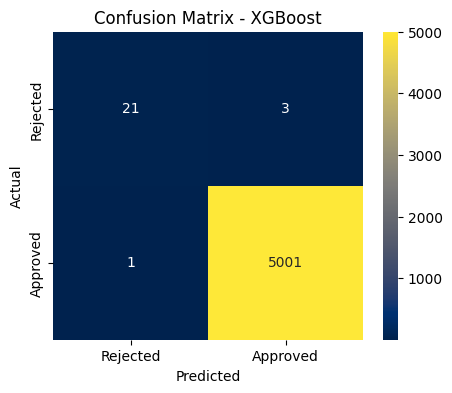

In [35]:
# Modelo 3: XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
train_and_evaluate(xgb, "XGBoost")

### Modelos basline (Logistic Regression, Random Forrest, Xgboost) `smoted`

In [36]:
# Función para entrenar y evaluar modelos con SMOTED
def train_and_evaluate_smoted(model, name):
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)
    
    print(f"\nModel: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    # Matriz de Confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='plasma', xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()


Model: Logistic Regression
Accuracy: 0.9946279347393554
              precision    recall  f1-score   support

           0       0.47      0.83      0.60        24
           1       1.00      1.00      1.00      5002

    accuracy                           0.99      5026
   macro avg       0.73      0.91      0.80      5026
weighted avg       1.00      0.99      1.00      5026



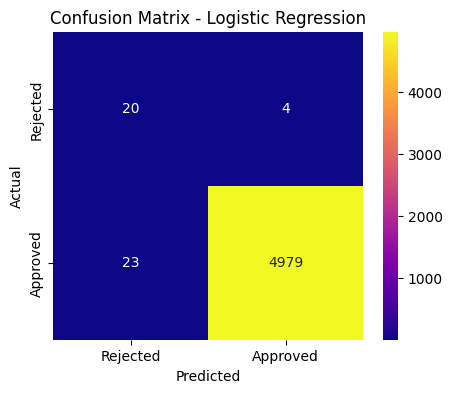

In [37]:
# Modelo 1: Regresión Logística
log_reg = LogisticRegression(max_iter=1000)
train_and_evaluate_smoted(log_reg, "Logistic Regression")


Model: Random Forest
Accuracy: 0.9974134500596896
              precision    recall  f1-score   support

           0       0.87      0.54      0.67        24
           1       1.00      1.00      1.00      5002

    accuracy                           1.00      5026
   macro avg       0.93      0.77      0.83      5026
weighted avg       1.00      1.00      1.00      5026



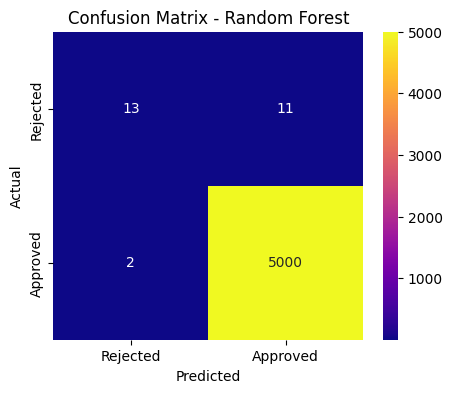

In [38]:
# Modelo 2: Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
train_and_evaluate_smoted(rf, "Random Forest")


Model: XGBoost
Accuracy: 0.9994031038599284
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        24
           1       1.00      1.00      1.00      5002

    accuracy                           1.00      5026
   macro avg       0.96      0.98      0.97      5026
weighted avg       1.00      1.00      1.00      5026



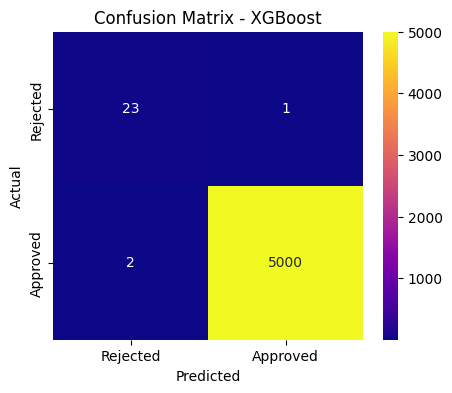

In [39]:
# Modelo 3: XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
train_and_evaluate_smoted(xgb, "XGBoost")

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Resultados iniciales de los modelos base (creamos un diccionario para despues poder hacer una tabla de comparacion)
model_results = {
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

# Evaluar cada modelo
for name, model in [("Logistic Regression", log_reg), ("Random Forest", rf), ("XGBoost", xgb)]:
    y_pred = model.predict(X_test)
    
    model_results["Accuracy"].append(accuracy_score(y_test, y_pred))
    model_results["Precision"].append(precision_score(y_test, y_pred))
    model_results["Recall"].append(recall_score(y_test, y_pred))
    model_results["F1-Score"].append(f1_score(y_test, y_pred))

In [41]:
df_results = pd.DataFrame(model_results)
df_results

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.994628,0.999197,0.995402,0.997296
1,Random Forest,0.997413,0.997805,0.999600,0.998702
2,XGBoost,0.999403,0.999800,0.999600,0.999700


In [42]:
print("Train Accuracy:", model.score(X_train, y_train))
print("Test Accuracy:", model.score(X_test, y_test))

Train Accuracy: 1.0
Test Accuracy: 0.9994031038599284


### Optimización de Hiperparámetros SMOTE

In [43]:
# 📌 Definición de hiperparámetros (Reducidos para acelerar)
param_grid = {
    'logreg': {
        'C': np.logspace(-4, 4, 10),
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    },
    'random_forest': {
        'n_estimators': [100, 300, 500],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    'xgb': {
        'n_estimators': [100, 300, 500],
        'max_depth': [3, 6, 9],
        'learning_rate': [0.01, 0.05, 0.1],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0]
    }
}

# 📌 Optimización con GridSearchCV
def optimize_model(X_train, y_train, model_name, use_smote=False):
    model_dict = {
        'logreg': LogisticRegression(max_iter=1000, random_state=42),
        'random_forest': RandomForestClassifier(random_state=42),
        'xgb': XGBClassifier(use_label_encoder=False, eval_metric='logloss', 
                             tree_method='hist', n_jobs=-1, random_state=42)
    }
    
    model = model_dict[model_name]
    
    # Cross-validation estratificada
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Si se quiere usar SMOTE, lo aplicas antes de definir el GridSearch
    if use_smote:
        smote = SMOTE(random_state=42)
        X_train, y_train = smote.fit_resample(X_train, y_train)
    
    search = GridSearchCV(
        model, 
        param_grid=param_grid[model_name], 
        cv=cv, 
        scoring='balanced_accuracy', 
        n_jobs=-1, 
        verbose=2
    )
    
    search.fit(X_train, y_train)
    return search.best_params_, search.best_score_, search.best_estimator_


# 📌 Ejecutar optimización para los tres modelos con y sin SMOTE
results = []
best_overall_score = 0  # Para seleccionar el mejor modelo
best_model = None  # Aquí guardaremos el mejor modelo
best_model_name = ""

models = ['logreg', 'random_forest', 'xgb']
smote_options = [False, True]

for model in models:
    for smote in smote_options:
        best_params, best_score, best_estimator = optimize_model(X_train, y_train, model, use_smote=smote)
        
        results.append({
            'Model': model,
            'SMOTE': smote,
            'Best Params': best_params,
            'Best Score (Recall)': best_score
        })
        
        # 📌 Guardar el mejor modelo basado en la mejor puntuación
        if best_score > best_overall_score:
            best_overall_score = best_score
            best_model = best_estimator
            best_model_name = model

# 📌 Crear DataFrame con los resultados
results_df = pd.DataFrame(results)

results_df

# 📌 Mostrar el mejor modelo
print(f"\n🏆 El mejor modelo es: {best_model_name} con una sensibilidad/recall del {best_overall_score:.6f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Fitting 5 folds for each of 243 candidates, totalling 1215 fits

🏆 El mejor modelo es: xgb con una sensibilidad/recall del 0.999900


In [44]:
# 📌 Mostrar los resultados
results_df

,Model,SMOTE,Best Params,Best Score (Recall)
0,logreg,False,"{'C': 2.782559402207126, 'penalty': 'l1', 'sol...",0.716304
1,logreg,True,"{'C': 166.81005372000558, 'penalty': 'l1', 'so...",0.997701
2,random_forest,False,"{'max_depth': 20, 'min_samples_leaf': 1, 'min_...",0.675789
3,random_forest,True,"{'max_depth': None, 'min_samples_leaf': 2, 'mi...",0.999325
4,xgb,False,"{'colsample_bytree': 1.0, 'learning_rate': 0.0...",0.979687
5,xgb,True,"{'colsample_bytree': 0.6, 'learning_rate': 0.1...",0.999900


In [45]:
# Imprimir los mejores parámetros y puntuaciones de cada modelo
for index, row in results_df.iterrows():
    print(f"🔹 Modelo: {row['Model']} (SMOTE: {row['SMOTE']})")
    print(f"   🎯 Mejor Score: {row['Best Score (Recall)']:.6f}")
    print("   ⚙️ Mejores Parámetros:")
    for param, value in row['Best Params'].items():
        print(f"      - {param}: {value}")
    print("-" * 50)  # Separador entre modelos


🔹 Modelo: logreg (SMOTE: False)
   🎯 Mejor Score: 0.716304
   ⚙️ Mejores Parámetros:
      - C: 2.782559402207126
      - penalty: l1
      - solver: liblinear
--------------------------------------------------
🔹 Modelo: logreg (SMOTE: True)
   🎯 Mejor Score: 0.997701
   ⚙️ Mejores Parámetros:
      - C: 166.81005372000558
      - penalty: l1
      - solver: liblinear
--------------------------------------------------
🔹 Modelo: random_forest (SMOTE: False)
   🎯 Mejor Score: 0.675789
   ⚙️ Mejores Parámetros:
      - max_depth: 20
      - min_samples_leaf: 1
      - min_samples_split: 2
      - n_estimators: 100
--------------------------------------------------
🔹 Modelo: random_forest (SMOTE: True)
   🎯 Mejor Score: 0.999325
   ⚙️ Mejores Parámetros:
      - max_depth: None
      - min_samples_leaf: 2
      - min_samples_split: 2
      - n_estimators: 100
--------------------------------------------------
🔹 Modelo: xgb (SMOTE: False)
   🎯 Mejor Score: 0.979687
   ⚙️ Mejores Parámetros:

### Optimización de Hiperparámetros NO SMOTE

In [46]:
# Definir hiperparámetros sin SMOTE
param_grid_no_smote = {
    'logreg': {
        'C': np.logspace(-4, 4, 10),  # Menos valores para acelerar
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    },
    'random_forest': {
        'n_estimators': [100, 300, 500],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    'xgb': {
        'n_estimators': [100, 300, 500],
        'max_depth': [3, 6, 9],
        'learning_rate': [0.01, 0.05, 0.1],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0]
    }
}

# Optimización sin SMOTE
def optimize_model_no_smote(X_train, y_train, model_name):
    model_dict = {
        'logreg': LogisticRegression(max_iter=1000, random_state=42),
        'random_forest': RandomForestClassifier(random_state=42),
        'xgb': XGBClassifier(use_label_encoder=False, eval_metric='logloss', tree_method='hist', n_jobs=-1, random_state=42)
    }
    
    model = model_dict[model_name]
    
    # Cross-validation estratificada
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    search = GridSearchCV(model, param_grid_no_smote[model_name], cv=cv, scoring='balanced_accuracy', n_jobs=-1)
    search.fit(X_train, y_train)
    return search.best_params_, search.best_score_

# Ejecutar optimización para los tres modelos
results_no_smote = []
models = ['logreg', 'random_forest', 'xgb']

for model in models:
    best_params, best_score = optimize_model_no_smote(X_train, y_train, model)
    results_no_smote.append({
        'Model': model,
        'Best Params': best_params,
        'Best Score (Recall)': best_score
    })

# Crear DataFrame con los resultados
results_df_no_smote = pd.DataFrame(results_no_smote)

# Mostrar resultados
results_df_no_smote

,Model,Best Params,Best Score (Recall)
0,logreg,"{'C': 2.782559402207126, 'penalty': 'l1', 'sol...",0.716304
1,random_forest,"{'max_depth': 20, 'min_samples_leaf': 1, 'min_...",0.675789
2,xgb,"{'colsample_bytree': 1.0, 'learning_rate': 0.0...",0.979687


In [47]:
# Imprimir los mejores parámetros y puntuaciones de cada modelo
for index, row in results_df_no_smote.iterrows():
    print(f"   🎯 Mejor Score: {row['Best Score (Recall)']:.6f}")
    print("   ⚙️ Mejores Parámetros:")
    for param, value in row['Best Params'].items():
        print(f"      - {param}: {value}")
    print("-" * 50)  # Separador entre modelos

   🎯 Mejor Score: 0.716304
   ⚙️ Mejores Parámetros:
      - C: 2.782559402207126
      - penalty: l1
      - solver: liblinear
--------------------------------------------------
   🎯 Mejor Score: 0.675789
   ⚙️ Mejores Parámetros:
      - max_depth: 20
      - min_samples_leaf: 1
      - min_samples_split: 2
      - n_estimators: 100
--------------------------------------------------
   🎯 Mejor Score: 0.979687
   ⚙️ Mejores Parámetros:
      - colsample_bytree: 1.0
      - learning_rate: 0.05
      - max_depth: 3
      - n_estimators: 300
      - subsample: 0.8
--------------------------------------------------



🔹 Reporte del mejor modelo: xgb
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        24
           1       1.00      1.00      1.00      5002

    accuracy                           1.00      5026
   macro avg       0.98      0.96      0.97      5026
weighted avg       1.00      1.00      1.00      5026



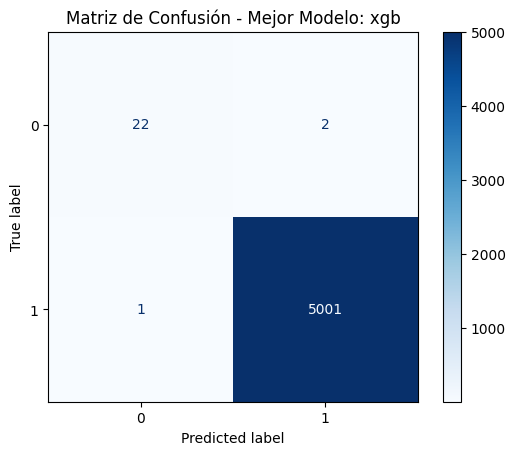

In [48]:
from sklearn.metrics import ConfusionMatrixDisplay

# Asumiendo que best_model y best_model_name ya están definidos
y_pred = best_model.predict(X_test)

# Mostrar reporte de clasificación
print(f"\n🔹 Reporte del mejor modelo: {best_model_name}")
print(classification_report(y_test, y_pred))

# Crear y mostrar la matriz de confusión con ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_estimator(
    best_model,             # Estimador entrenado
    X_test, 
    y_test, 
    display_labels=[0,1],   # Ajustar según tus clases
    cmap="Blues",           # Ajustar el mapa de color si deseas
    values_format="d"       # Formato de los valores
)

plt.title(f"Matriz de Confusión - Mejor Modelo: {best_model_name}")
plt.show()

In [49]:
# Métrica en training
y_pred_train = best_model.predict(X_train)
acc_train = balanced_accuracy_score(y_train, y_pred_train)

# Métrica en test
y_pred_test = best_model.predict(X_test)
acc_test = balanced_accuracy_score(y_test, y_pred_test)

print(f"Balanced Accuracy - Train: {acc_train:.4f}")
print(f"Balanced Accuracy - Test: {acc_test:.4f}")

Balanced Accuracy - Train: 1.0000
Balanced Accuracy - Test: 0.9582


### Pipeline

In [62]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pickle
import joblib


# ===========================================================================
# 1. load_data()
# ===========================================================================
def load_data(path: str) -> pd.DataFrame:
    """
    Carga el dataset desde un archivo CSV (o la fuente que corresponda).
    """
    df = pd.read_csv(path)
    return df

# Rutas de tus archivos CSV
train_path = "../data/Application_Data_train.csv"
test_path = "../data/Application_Data_test.csv"


# Nombre de la columna objetivo
target = "Status"  # Reemplaza con el nombre real

# Cargar datos de train y test
train = load_data(train_path)
test = load_data(test_path)

train.columns = train.columns.str.strip()
test.columns = test.columns.str.strip()

# Definir las columnas a excluir
columns_to_exclude = ['Owned_Mobile_Phone']

# Preprocesado de datos con ColumnTransformer
# Este es un pipeline para columnas categóricas

# Columnas numéricas y categóricas reales de tu dataset
num_features = [
    "Applicant_Age", "Years_of_Working", "Total_Bad_Debt",
    "Total_Good_Debt", "Total_Children", "Total_Family_Members"
]

cat_features = [
    "Applicant_Gender", "Income_Type", "Education_Type",
    "Family_Status", "Housing_Type", "Job_Title"
]

X_train = train[cat_features + num_features]
y_train = train[target]

# Si quieres excluir columnas como ID o constantes
columns_to_exclude = ["Applicant_ID", "Owned_Mobile_Phone"]

# Pipeline numérico
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

# Pipeline categórico
cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# ColumnTransformer completo
preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features),
    ("drop", "drop", columns_to_exclude)
], remainder="passthrough")

train.columns = train.columns.str.strip()
test.columns = test.columns.str.strip()

# Aplicamos el preprocesado a los datos de entrenamiento
pipe_train = preprocessing.fit_transform(X_train)
df_check = pd.DataFrame(pipe_train, columns=preprocessing.get_feature_names_out())
print("Data después del preprocesado:")
print(df_check.head())

# Creamos los pipelines para los modelos
logistic_pipeline = Pipeline([
    ("Preprocesado", preprocessing),
    ("Modelo", LogisticRegression())
])
random_pipeline = Pipeline([
    ("Preprocesado", preprocessing),
    ("Modelo", RandomForestClassifier())
])
xgb_pipeline = Pipeline([
    ("Preprocesado", preprocessing),
    ("Modelo", XGBClassifier())
])
# Evaluación usando cross-validation
for name, pipe in zip(["logistic", "randomF", "XGB"], [logistic_pipeline, random_pipeline, xgb_pipeline]):
    resultado = cross_val_score(pipe, train, y_train, cv=5, scoring="accuracy")
    print(f"{name}: {np.mean(resultado):.4f}")
    print(resultado)
# Definir hiperparámetros para GridSearch
reg_log_param = {
    "Modelo__penalty": [None, "l2"],
    "Modelo__C": np.logspace(0, 4, 10)
}
rand_forest_param = {
    'Modelo__n_estimators': [10, 100, 200, 400],
    'Modelo__max_depth': [1, 2, 4, 8],
    'Modelo__max_features': [1, 2, 3]
}
xgb_param = {
    'Modelo__n_estimators': [10, 100, 200, 400],
    'Modelo__max_depth': [1, 2, 4, 8],
    'Modelo__learning_rate': [0.1, 0.2, 0.5, 1.0]
}
# Crear GridSearchCV para optimizar los modelos
gs_reg_log = GridSearchCV(logistic_pipeline,
                          reg_log_param,
                          cv=5,
                          scoring="accuracy",
                          verbose=1,
                          n_jobs=-1)
gs_rand_forest = GridSearchCV(random_pipeline,
                              rand_forest_param,
                              cv=5,
                              scoring="accuracy",
                              verbose=1,
                              n_jobs=-1)
gs_xgb = GridSearchCV(xgb_pipeline,
                      xgb_param,
                      cv=5,
                      scoring="accuracy",
                      verbose=1,
                      n_jobs=-1)
# Crear un diccionario con los resultados de GridSearch
grids = {"gs_reg_log": gs_reg_log,
         "gs_rand_forest": gs_rand_forest,
         "gs_xgb": gs_xgb}

# Ejecutar GridSearchCV
X_train = preprocess_data(train)  # Preprocesar los datos
for nombre, grid_search in grids.items():
    grid_search.fit(X_train, y_train)

# Mostrar los mejores resultados
best_grids = [(i, j.best_score_) for i, j in grids.items()]
best_grids = pd.DataFrame(best_grids, columns=["Grid", "Best score"]).sort_values(by="Best score", ascending=False)
print(best_grids)

# Guardar el mejor modelo con pickle y joblib
best_model = grids[best_grids.iloc[0, 0]]
print(best_model)

# Usando pickle:
with open('modelo_pipeline.pkl', 'wb') as archivo:
    pickle.dump(best_model, archivo)

# Usando joblib:
joblib.dump(best_model, 'modelo_pipeline.joblib')

# Visualización del DataFrame final
df_check = pd.DataFrame(X_train, columns=preprocessing.get_feature_names_out())
df_check.head()

KeyError: "['Applicant_Gender', 'Income_Type', 'Education_Type', 'Family_Status', 'Housing_Type', 'Job_Title'] not in index"

In [63]:
print(X_train.columns.tolist())


['Total_Children', 'Owned_Mobile_Phone', 'Total_Family_Members', 'Applicant_Age', 'Years_of_Working', 'Total_Bad_Debt', 'Total_Good_Debt', 'Applicant_Gender_F', 'Applicant_Gender_M', 'Income_Type_Commercial associate', 'Income_Type_Pensioner', 'Income_Type_State servant', 'Income_Type_Student', 'Income_Type_Working', 'Education_Type_Academic degree', 'Education_Type_Higher education', 'Education_Type_Incomplete higher', 'Education_Type_Lower secondary', 'Education_Type_Secondary / secondary special', 'Family_Status_Civil marriage', 'Family_Status_Married', 'Family_Status_Separated', 'Family_Status_Single / not married', 'Family_Status_Widow', 'Housing_Type_Co-op apartment', 'Housing_Type_House / apartment', 'Housing_Type_Municipal apartment', 'Housing_Type_Office apartment', 'Housing_Type_Rented apartment', 'Housing_Type_With parents', 'Job_Title_Accountants', 'Job_Title_Cleaning staff', 'Job_Title_Cooking staff', 'Job_Title_Core staff', 'Job_Title_Drivers', 'Job_Title_HR staff', 'Job_